In [1]:
#week2.1
#using losgistic regression from scikit.learn to train a model

In [57]:
#importing necessary libraries
import pandas as pd
import numpy as np
#importing sklearn modules for logit-regression
#to divide the data into training and testing sets
from sklearn.model_selection import train_test_split
#to train the model
from sklearn.linear_model import LogisticRegression
#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [720]:
#reading the file
clv = pd.read_csv('processed.cleveland.data', header = None)
print(clv)

       0    1    2      3      4    5    6      7    8    9    10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    ?  3.0   

     13  
0     0  
1     2  
2     1  
3     0  
4

In [722]:
#defining column names
column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
#assigning the column names by merging the dataframes
clvcol = pd.read_csv('processed.cleveland.data', names = column_names)
#checking the result
print(clvcol)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  num  
0      3.0  0.0  6.0   

In [734]:
#inspecting the dataframe
#checking for null values
print(clvcol.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


In [702]:
#description
print(clvcol.describe())

              age         sex          cp   chol         num
count  123.000000  123.000000  123.000000  123.0  123.000000
mean    55.317073    0.918699    3.699187    0.0    1.804878
std      9.032108    0.274414    0.688726    0.0    1.013503
min     32.000000    0.000000    1.000000    0.0    0.000000
25%     51.000000    1.000000    4.000000    0.0    1.000000
50%     56.000000    1.000000    4.000000    0.0    2.000000
75%     61.500000    1.000000    4.000000    0.0    3.000000
max     74.000000    1.000000    4.000000    0.0    4.000000


In [768]:
#dropping '?' null value rows
clvfct = clvcol[clvcol['ca'] != '?']
clvoh = clvfct[clvfct['thal'] != '?']
print(clvoh.info())

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB
None


In [770]:
#checking output
print(clvoh)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  num  
0      3.0  0.0  6.0   

In [772]:
#no null values found
#now checking for dupes
print(clvoh.duplicated().sum())

0


In [774]:
#no duplicated rows were found

<Axes: >

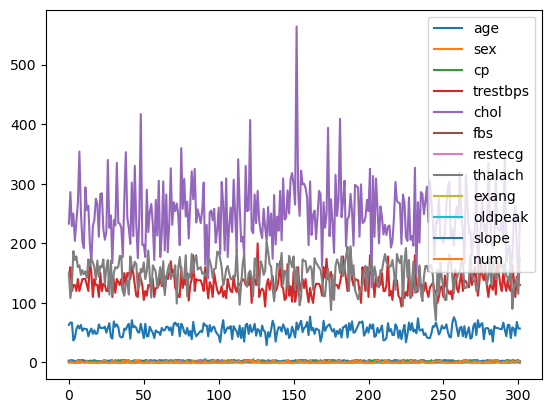

In [776]:
#visualizing the data
clvoh.plot(kind='line')

In [778]:
#data needs standardization
#the plot is kinda all over the place

<Axes: >

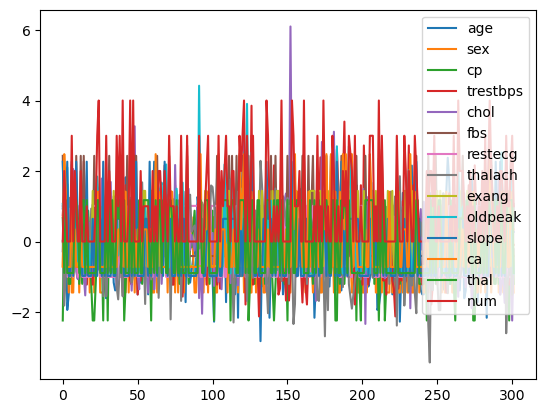

In [780]:
#standardizing the data using StandardScaler from sklearn
#impporting the module
from sklearn.preprocessing import StandardScaler, label_binarize
#we don't need to standardize the 'num' column since its the output
#excluding 'num' using columns.difference, columns to standardize:
std_col = clvoh.columns.difference(['num'])
#initialize the standard scaler
scaler = StandardScaler()
#copying the format
scaled_clv = clvoh.copy()
#fitting and transforming the data
scaled_clv[std_col] = scaler.fit_transform(clvoh[std_col])
#dataframe conversion
clv_std = pd.DataFrame(scaled_clv, columns = clvoh.columns)
#plotting again
clv_std.plot(kind='line')

In [782]:
#the values  are closer now

In [784]:
#now starting the model training process

In [786]:
#selecting the the dependent variable
#num is the Heart disease diagnosis status
y = clvoh['num']
#selecting the independent variables for predicting heart disease
X = clv_std[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]


In [790]:
#splitting the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [792]:
#importing the OneVsRest module to train multiclass datasets
from sklearn.multiclass import OneVsRestClassifier

In [794]:
#creating the model, using onevsrest
model = OneVsRestClassifier(LogisticRegression(solver = 'liblinear'))
#training the model
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [796]:
#predicting on a test#
y_pred = model.predict(X_test)

In [798]:
#checking sizes
print(f'Size of y_test: {len(y_test)}')
print(f'Size of y_pred: {len(y_pred)}')

Size of y_test: 60
Size of y_pred: 60


In [800]:
#the sizes seem to be fine

In [802]:
#checking model performance
#importing the slearn metrics module
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

In [826]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#precision
precision = precision_score(y_test, y_pred, average = 'weighted')
print(f'Precision: {precision}')
# Calculate recall
recall = recall_score(y_test, y_pred, average = 'weighted')
print(f'Recall: {recall}')
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.6333333333333333
Precision: 0.5616666666666666
Recall: 0.6333333333333333
Confusion Matrix:
[[35  1  0  0  0]
 [ 5  1  0  2  1]
 [ 2  1  1  1  0]
 [ 1  2  1  1  2]
 [ 2  0  0  1  0]]


In [834]:
#test score
model.score(X_test, y_test)

0.6333333333333333

In [836]:
#train score
model.score(X_train, y_train)

0.6708860759493671

In [838]:
#the test and train scores are similar
#plotting the ROC-Curve

In [812]:
# Predict probabilities for the test set
y_score = model.predict_proba(X_test)

In [814]:
# Calculate the ROC curve values
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_score.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

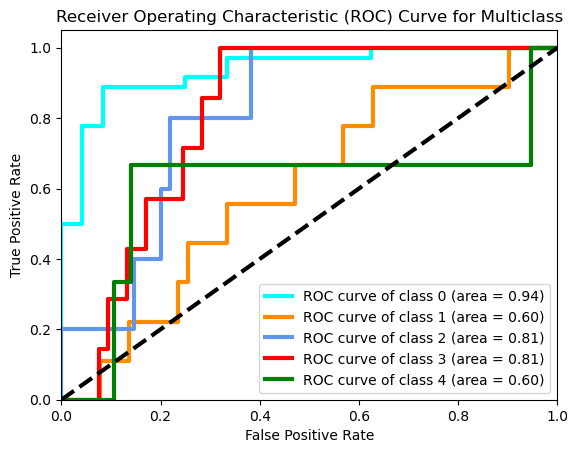

In [816]:
# Plot the ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=3,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")